In [90]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой
import scipy

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb
from math import sqrt
import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

In [91]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(1)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,N,502,419,369,431,N,54,43,29,11,137,N
1069,3827,West Virginia University,WV,I,535,431,361,439,Y,642,521,438,529,N,335,237,272,22,895,Y
1070,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,N,572,494,434,495,N,25,22,24,3,74,N
1071,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,N,486,416,348,381,N,8,20,25,12,65,N


In [92]:
X = df.A15.to_numpy()
Y = df.A13.to_numpy()

In [93]:
F = np.array([np.array([1]*len(X)), X, X ** 2]).transpose()
dF = np.dot(F.transpose(), F)
result = np.dot(np.linalg.inv(dF), F.transpose()).dot(Y)
beta_0 = result[0]
beta_1 = result[1]
beta_2 = result[2]
print(f"beta0 = {result[0]} \nbeta1 = {result[1]} \nbeta2 = {result[2]}")

beta0 = 460.11824200766114 
beta1 = 1.0224467763908305 
beta2 = -0.0008905357772385812


In [94]:
def f(x):
    return beta_0 + beta_1 * x + beta_2 * x ** 2

In [95]:
data = {
    'X': X,
    'Y': f(X)
}
df1 = pd.DataFrame(data)
df1

,X,Y
0,6,466.220863
1,74,530.902730
2,9,469.248130
3,115,565.922286
4,59,517.342647
...,...,...
1068,54,512.733566
1069,335,702.697534
1070,25,485.122827
1071,8,468.240822


In [96]:
X_grp = df1.groupby('X')
X_grp

In [97]:
len(X), len(X_grp)

(1073, 292)

In [98]:
n = len(Y)
D_YX = np.sum(X_grp.count().to_numpy() * (X_grp.mean().to_numpy() - np.mean(Y)) ** 2) * 1 / n
D_YX

5844.452186347219

In [99]:
D_resY = np.sum((Y - f(X)) ** 2) / n

# D_resY = np.mean((Y - f(X)) ** 2)
D_resY

8186.039721699913

In [100]:
D_res = np.var(Y)
D_res

14030.491908047135

In [101]:
print(f"{D_YX = }")
print(f"{D_resY = }")
print(f"{D_res = }")
print(f"{D_YX + D_resY = }")

D_YX = 5844.452186347219
D_resY = 8186.039721699913
D_res = 14030.491908047135
D_YX + D_resY = 14030.491908047132


In [102]:
RXY = D_YX/D_res
RXY

0.41655361940625585

In [103]:
sqrt(RXY)

0.6454096523962559

C:\Users\Artemii\AppData\Local\Temp\ipykernel_1760\2516359590.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_arr = np.array([1, X1, X1 ** 2])


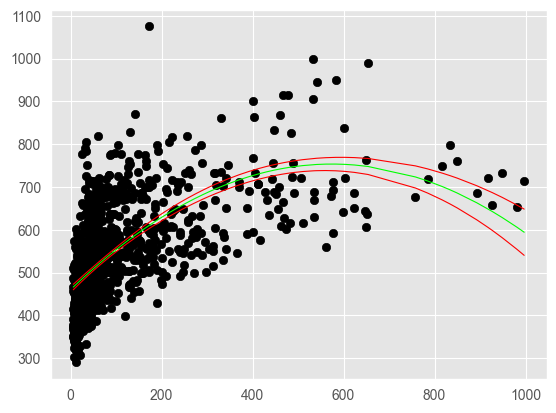

In [111]:
X1 = np.sort(X)
new_D_res = np.sum((Y - f(X)) ** 2) / (n - 2)
quantile = stats.t(n - 3).ppf(1- 0.1/2)

x_arr = np.array([1, X1, X1 ** 2])
flow = f(X1) - quantile * np.sqrt(new_D_res * x_arr.transpose() @ np.linalg.inv(dF) @ x_arr)
fhigh = f(X1) + quantile * np.sqrt(new_D_res * x_arr.transpose() @ np.linalg.inv(dF) @ x_arr)

plt.scatter(X, Y, color='black')
plt.plot(X1, f(X1), color='lime', linewidth = 0.8)
plt.plot(X1, fhigh, linestyle = '-',color='red', linewidth = 0.8)
plt.plot(X1, flow, linestyle = '-', color='red', linewidth = 0.8)

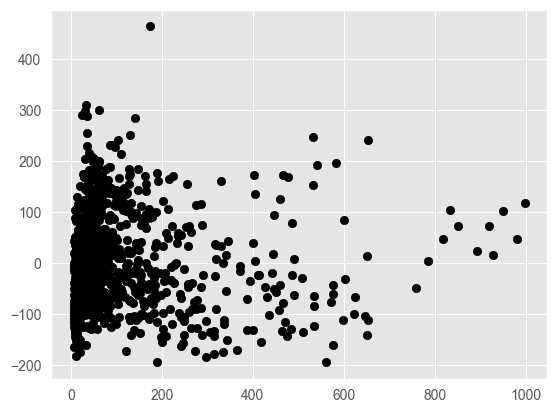

In [114]:
remainses = Y - (f(X))
plt.scatter(X, remainses, color='black')

In [136]:
z = (D_YX * (n - 3)) / (2 * D_resY)
print(f'Sign test: z = {round(z, 3)}, p-value = {1 - stats.f(2, n-3).cdf(z)}')

Sign test: z = 381.965, p-value = 1.1102230246251565e-16
